<a href="https://colab.research.google.com/github/galitneu/DiabetesProject/blob/main/02_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import os
import warnings
from google.colab import drive
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu

## 1️⃣ Setup & Data Loading

Loading the pre-cleaned dataset and creating output directories for reports.

In [2]:


# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Step 1: Connect to Google Drive
print("Connecting to Google Drive...")
drive.mount('/content/drive')
print("✓ Connected!\n")

# Step 2: Load the pre-cleaned data
print("Loading data...")
df = pd.read_pickle('/content/drive/My Drive/df_after_prep.pkl')
print(f"✓ Loaded successfully! Dataset contains {len(df):,} rows\n")

# Step 3: Create output directory for reports
print("Creating output directory...")
output_dir = '/content/drive/My Drive/diabetes_reports'
os.makedirs(output_dir, exist_ok=True)
print(f"✓ Directory created: {output_dir}\n")

# Step 4: Generate Excel reports for quick reference
print("Generating Excel reports...")

# Report 1: Column data types
df.dtypes.to_excel(f"{output_dir}/1_column_dtypes.xlsx")
print("  ✓ 1_column_dtypes.xlsx")

# Report 2: Maximum values (numerical columns only)
df.select_dtypes(include=['number']).max().to_excel(f"{output_dir}/2_max_values.xlsx")
print("  ✓ 2_max_values.xlsx")

# Report 3: Minimum values (numerical columns only)
df.select_dtypes(include=['number']).min().to_excel(f"{output_dir}/3_min_values.xlsx")
print("  ✓ 3_min_values.xlsx")

# Report 4: Missing values count
df.isnull().sum().to_excel(f"{output_dir}/4_missing_values.xlsx")
print("  ✓ 4_missing_values.xlsx")

# Report 5: Unique values count
df.nunique().to_excel(f"{output_dir}/5_unique_values.xlsx")
print("  ✓ 5_unique_values.xlsx")

print("\n✅ Setup complete!")

Connecting to Google Drive...
Mounted at /content/drive
✓ Connected!

Loading data...
✓ Loaded successfully! Dataset contains 99,319 rows

Creating output directory...
✓ Directory created: /content/drive/My Drive/diabetes_reports

Generating Excel reports...
  ✓ 1_column_dtypes.xlsx
  ✓ 2_max_values.xlsx
  ✓ 3_min_values.xlsx
  ✓ 4_missing_values.xlsx
  ✓ 5_unique_values.xlsx

✅ Setup complete!


## 2️⃣ Initial Data Inspection

Understanding the structure, size, and data types of our dataset.

In [3]:
# Display comprehensive dataset information
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("DATASET SHAPE")
print("=" * 80)
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
Index: 99319 entries, 0 to 101765
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   patient_nbr               99319 non-null  int64   
 1   encounter_id              99319 non-null  int64   
 2   race                      99319 non-null  category
 3   gender                    99319 non-null  category
 4   age_group                 99319 non-null  category
 5   admission_grouped         99319 non-null  category
 6   specialty_grouped         99319 non-null  category
 7   admission_source_grouped  99319 non-null  category
 8   payer_grouped             99319 non-null  category
 9   discharge_grouped         99319 non-null  category
 10  time_in_hospital          99319 non-null  int64   
 11  num_lab_procedures        99319 non-null  int64   
 12  num_procedures            99319 non-null  int64   
 13  num_medications           99319 n

## 3️⃣ Automated EDA with ydata-profiling


In [5]:
# Install ydata-profiling if not already installed
!pip install ydata-profiling

from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("GENERATING YDATA-PROFILING REPORT")
print("="*80)
print("\n⏳ This may take several minutes...\n")

# Create the profile report
# Configuration for large datasets
profile = ProfileReport(
    df,
    title="Diabetes Readmission - EDA Report",
    explorative=True,

    progress_bar=False,
    # Performance optimizations for large datasets
    minimal=False,  # Set to True for faster but less detailed report

    # Correlation settings
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": False},  # Slow on large datasets
        "phi_k": {"calculate": True},
        "cramers": {"calculate": True},
    },

    # Interaction settings
    interactions={
        "continuous": True,
        "targets": ["readmitted_binary"]  # Focus on target variable
    },

    # Missing values settings
    missing_diagrams={
        "heatmap": True,
        "dendrogram": True,
        "matrix": True
    }
)

# Save report to Google Drive
report_path = '/content/drive/My Drive/diabetes_reports/diabetes_eda_profile_report.html'
profile.to_file(report_path)

print("\n" + "="*80)
print("✅ REPORT GENERATED SUCCESSFULLY!")
print("="*80)
print(f"\n📊 Report saved to: {report_path}")
print("\n💡 How to view:")
print("   1. Navigate to your Google Drive")
print("   2. Open the 'diabetes_reports' folder")
print("   3. Download 'diabetes_eda_profile_report.html'")
print("   4. Open it in your web browser")
print("\n📋 What's in the report:")
print("   • Overview: Dataset statistics and warnings")
print("   • Variables: Detailed analysis of each feature")
print("   • Interactions: Relationships with target variable")
print("   • Correlations: Multiple correlation matrices")
print("   • Missing values: Patterns and visualizations")
print("   • Sample: First rows of the dataset")
print("\n⚡ Pro tip: The report is interactive - click on tabs and variables to explore!")

GENERATING YDATA-PROFILING REPORT

⏳ This may take several minutes...



100%|██████████| 33/33 [00:00<00:00, 48.42it/s]



✅ REPORT GENERATED SUCCESSFULLY!

📊 Report saved to: /content/drive/My Drive/diabetes_reports/diabetes_eda_profile_report.html

💡 How to view:
   1. Navigate to your Google Drive
   2. Open the 'diabetes_reports' folder
   3. Download 'diabetes_eda_profile_report.html'
   4. Open it in your web browser

📋 What's in the report:
   • Overview: Dataset statistics and warnings
   • Variables: Detailed analysis of each feature
   • Interactions: Relationships with target variable
   • Correlations: Multiple correlation matrices
   • Missing values: Patterns and visualizations
   • Sample: First rows of the dataset

⚡ Pro tip: The report is interactive - click on tabs and variables to explore!


## 4️⃣ Target Variable Analysis

Analyzing the distribution of our target variable: `readmitted_binary`

- **True**: Patient was readmitted
- **False**: Patient was not readmitted

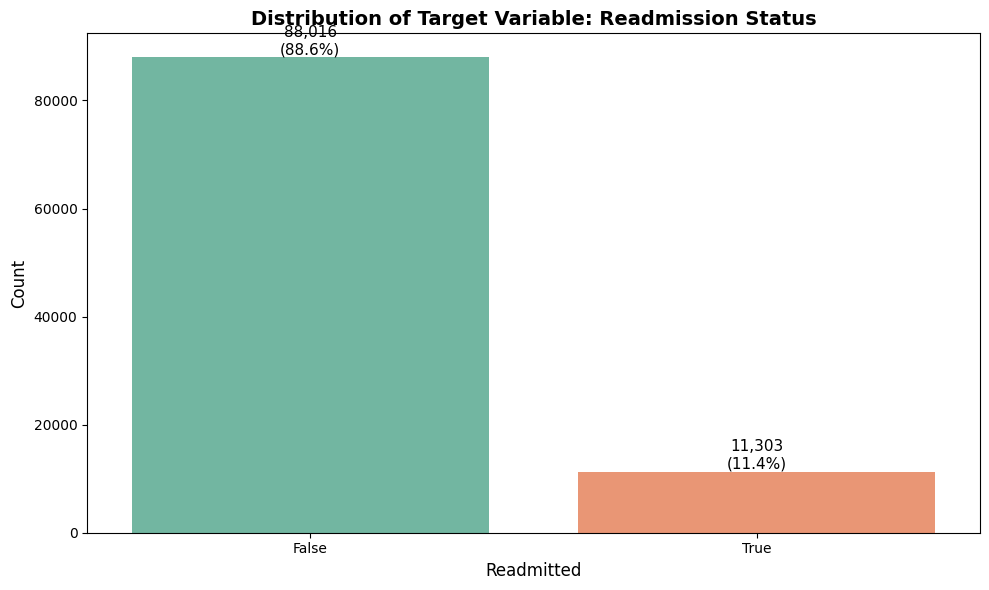


TARGET VARIABLE STATISTICS
Not Readmitted (False): 88,016 (88.62%)
Readmitted (True): 11,303 (11.38%)

Class Imbalance Ratio: 1:7.79


In [6]:
# Count plot for target variable
plt.figure(figsize=(10, 6))
sb.countplot(x='readmitted_binary', data=df, palette='Set2')
plt.title('Distribution of Target Variable: Readmission Status', fontsize=14, fontweight='bold')
plt.xlabel('Readmitted', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add value labels on bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height,
            f'{int(height):,}\n({height/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Print statistics
print("\n" + "=" * 60)
print("TARGET VARIABLE STATISTICS")
print("=" * 60)
target_counts = df['readmitted_binary'].value_counts()
target_pct = df['readmitted_binary'].value_counts(normalize=True) * 100
print(f"Not Readmitted (False): {target_counts[False]:,} ({target_pct[False]:.2f}%)")
print(f"Readmitted (True): {target_counts[True]:,} ({target_pct[True]:.2f}%)")
print(f"\nClass Imbalance Ratio: 1:{target_counts[False]/target_counts[True]:.2f}")

## 5️⃣ Categorical Features Analysis

Visualizing the distribution of all categorical variables in the dataset.

This helps us understand:
- Category frequencies
- Potential imbalances
- Dominant categories

CATEGORICAL FEATURES ANALYSIS (22 features)


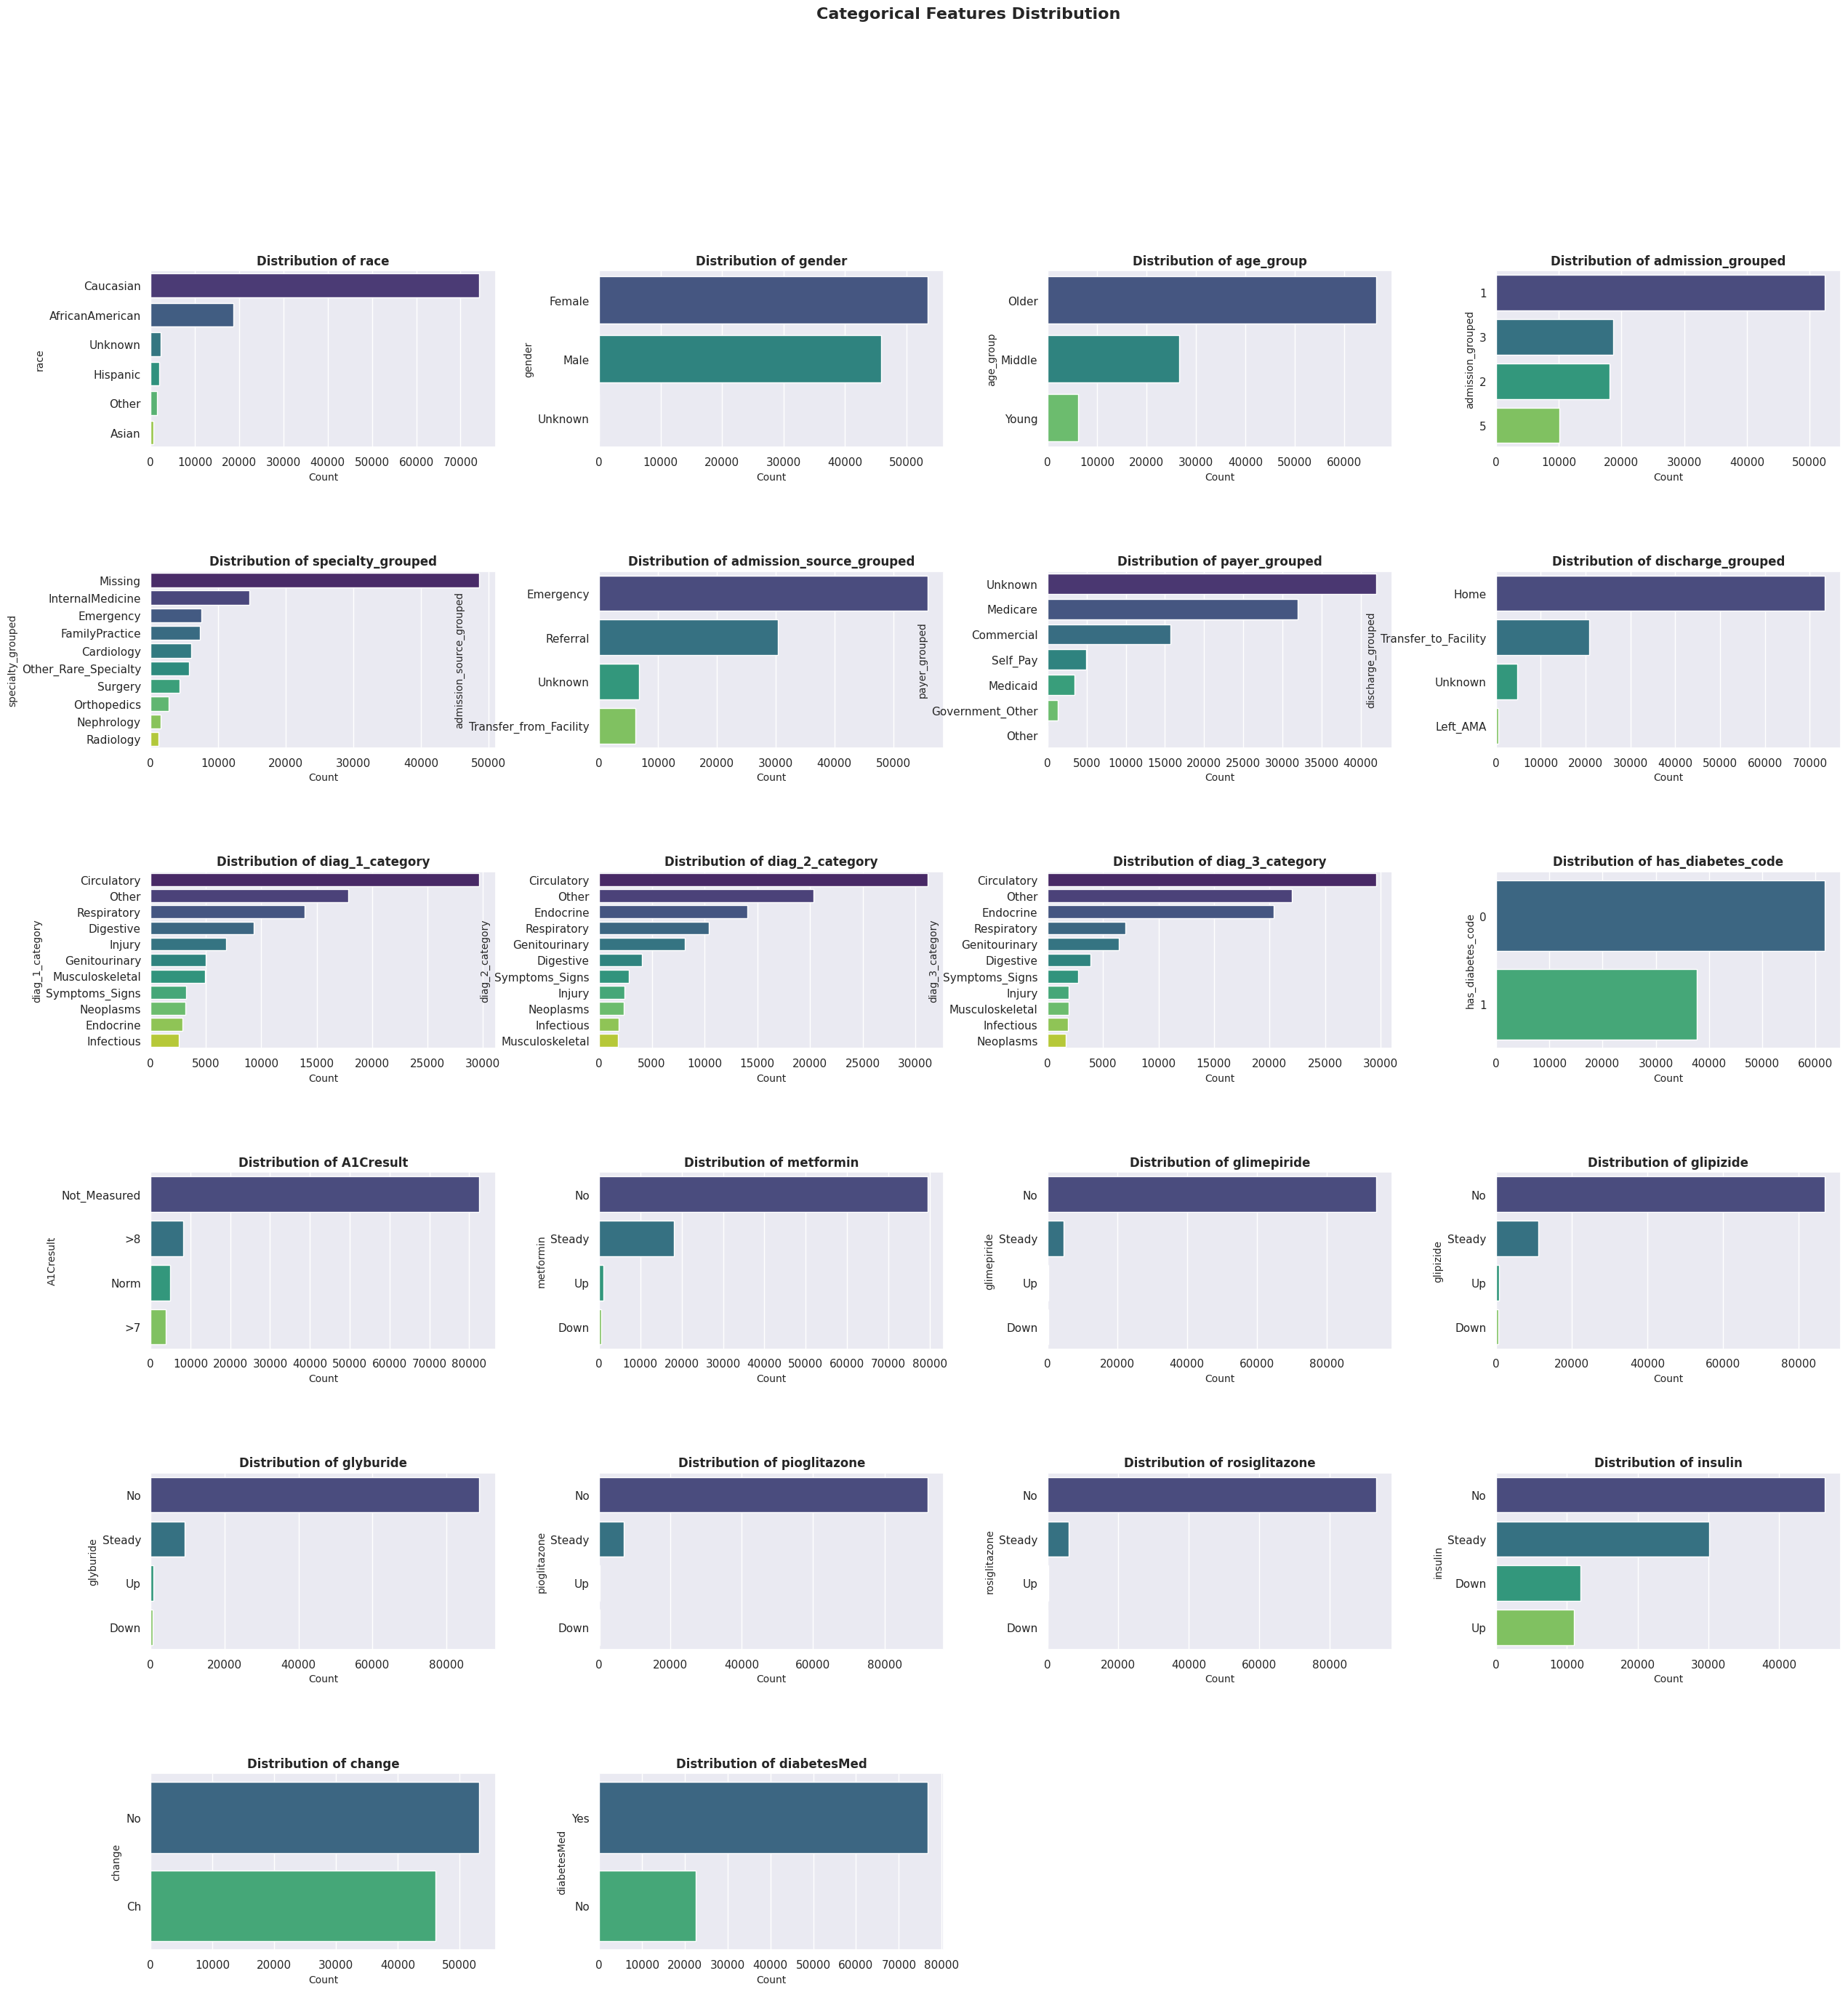


Categorical Features Summary:
--------------------------------------------------------------------------------
race                          :   6 unique categories
gender                        :   3 unique categories
age_group                     :   3 unique categories
admission_grouped             :   4 unique categories
specialty_grouped             :  10 unique categories
admission_source_grouped      :   4 unique categories
payer_grouped                 :   7 unique categories
discharge_grouped             :   4 unique categories
diag_1_category               :  11 unique categories
diag_2_category               :  11 unique categories
diag_3_category               :  11 unique categories
has_diabetes_code             :   2 unique categories
A1Cresult                     :   4 unique categories
metformin                     :   4 unique categories
glimepiride                   :   4 unique categories
glipizide                     :   4 unique categories
glyburide               

In [7]:
# Select all categorical columns
categorical_df = df.select_dtypes(include=['category'])
categorical_cols_list = categorical_df.columns
num_cols = len(categorical_cols_list)

# Calculate grid dimensions (4 columns per row)
cols_per_row = 4
rows_needed = (num_cols + cols_per_row - 1) // cols_per_row

# Create figure with subplots
fig = plt.figure(figsize=(30, rows_needed * 5))
plt.subplots_adjust(hspace=0.7, wspace=0.3)
sb.set(font_scale=1.0)

print("=" * 80)
print(f"CATEGORICAL FEATURES ANALYSIS ({num_cols} features)")
print("=" * 80)

# Plot each categorical variable
for idx, col in enumerate(categorical_cols_list, 1):
    plt.subplot(rows_needed, cols_per_row, idx)
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')

    # Use horizontal bars for better readability
    sb.countplot(y=categorical_df[col],
                 order=categorical_df[col].value_counts().index,
                 palette='viridis')

    plt.ylabel(col, fontsize=10)
    plt.xlabel('Count', fontsize=10)

plt.suptitle('Categorical Features Distribution', fontsize=16, fontweight='bold', y=1.001)
plt.show()

# Print summary statistics
print("\nCategorical Features Summary:")
print("-" * 80)
for col in categorical_cols_list:
    n_categories = categorical_df[col].nunique()
    print(f"{col:30s}: {n_categories:3d} unique categories")

## 6️⃣ Numerical Features Analysis

Analyzing continuous and count variables to understand their distributions.

**Key numerical features:**
- Hospital stay duration
- Number of procedures and lab tests
- Medication counts
- Visit history (inpatient, outpatient, emergency)

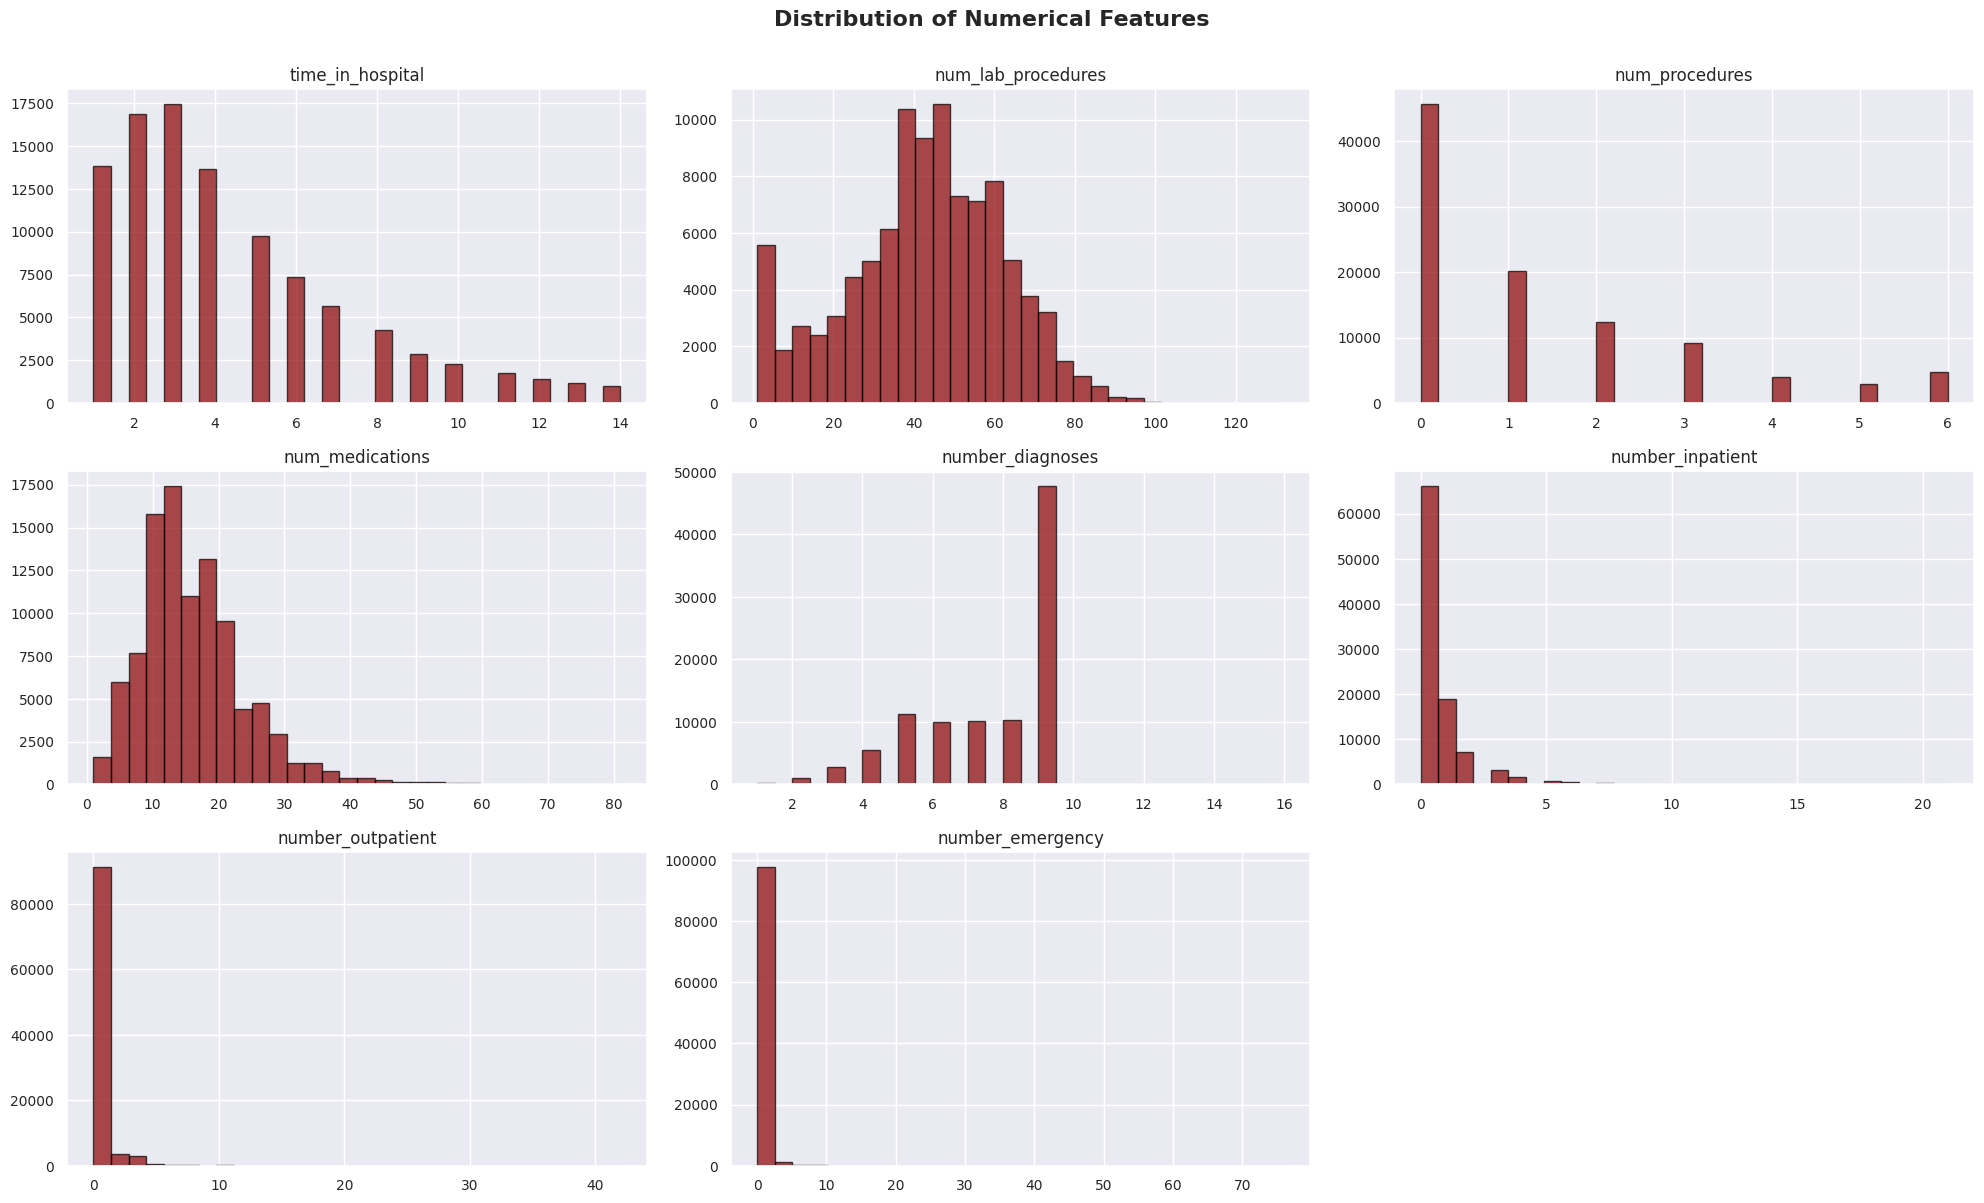


NUMERICAL FEATURES - DESCRIPTIVE STATISTICS
       time_in_hospital  num_lab_procedures  num_procedures  num_medications  number_diagnoses  number_inpatient  number_outpatient  number_emergency
count          99319.00            99319.00        99319.00         99319.00          99319.00          99319.00           99319.00          99319.00
mean               4.38               42.91            1.33            15.98              7.40              0.63               0.37              0.20
std                2.97               19.61            1.70             8.09              1.94              1.26               1.27              0.94
min                1.00                1.00            0.00             1.00              1.00              0.00               0.00              0.00
25%                2.00               31.00            0.00            10.00              6.00              0.00               0.00              0.00
50%                4.00               44.00            

In [8]:
# Define continuous/count columns (excluding IDs)
continuous_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_diagnoses', 'number_inpatient',
    'number_outpatient', 'number_emergency'
]

con_df = df[continuous_cols]

# Create histograms
fig = con_df.hist(figsize=(20, 12), bins=30, xlabelsize=10, ylabelsize=10,
                   color='darkred', edgecolor='black', alpha=0.7)

plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

# Print descriptive statistics
print("\n" + "=" * 80)
print("NUMERICAL FEATURES - DESCRIPTIVE STATISTICS")
print("=" * 80)
print(con_df.describe().round(2).to_string())

## 7️⃣ Correlation Analysis

Examining relationships between numerical features using a correlation heatmap.

This helps identify:
- Highly correlated features (potential multicollinearity)
- Features strongly related to the target
- Independent feature groups

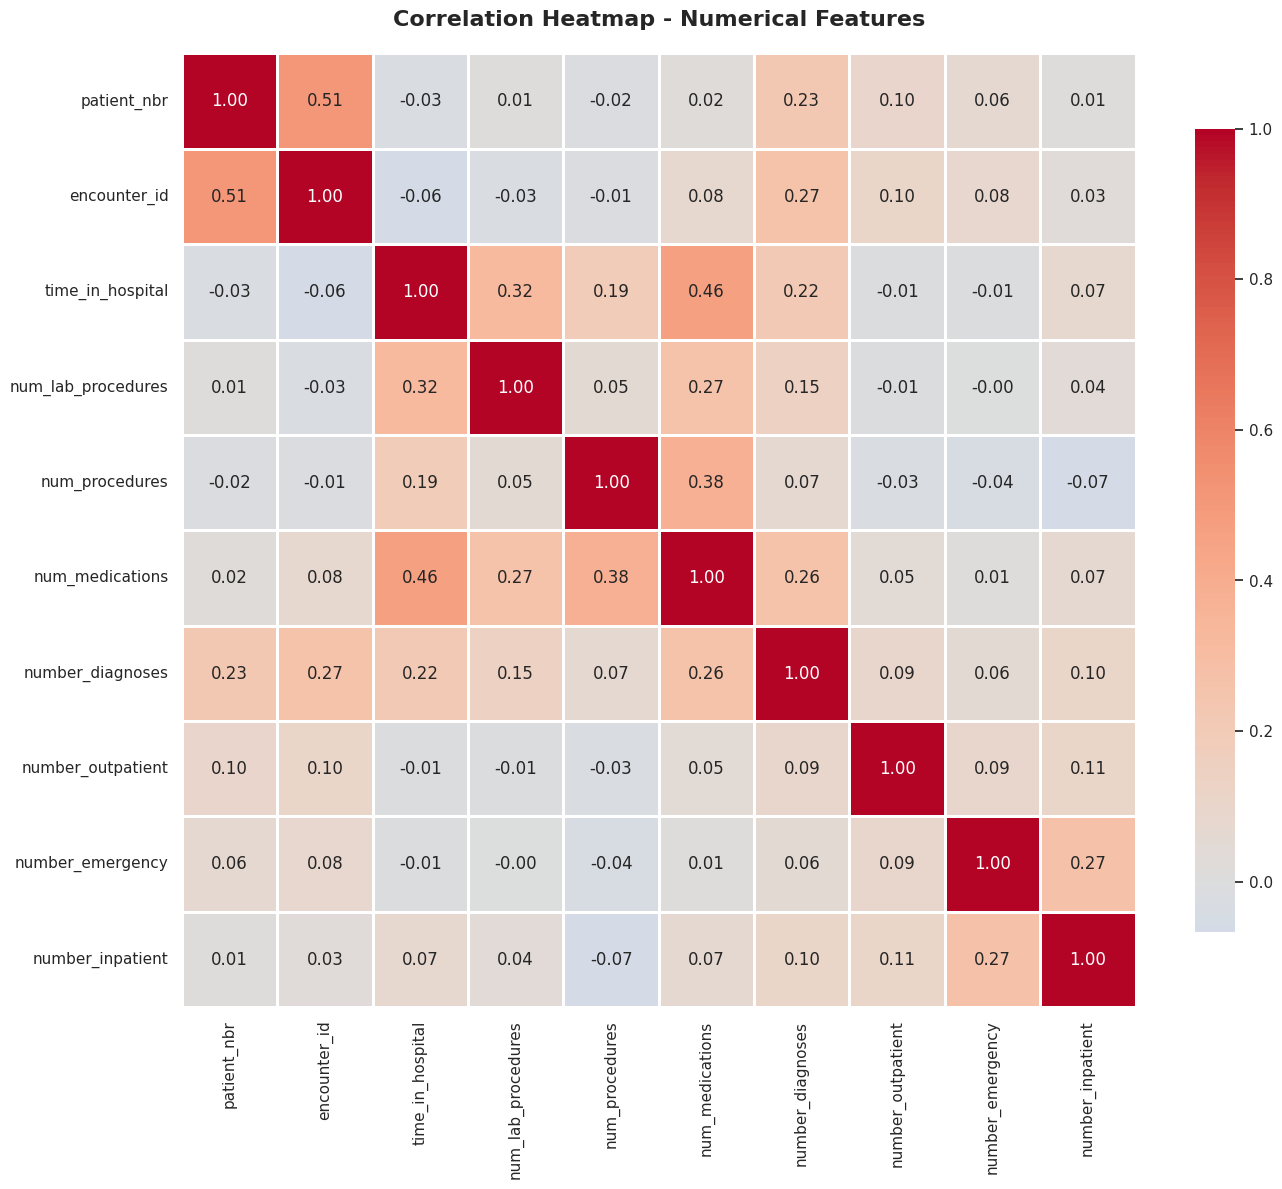


HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.7)
No highly correlated pairs found (threshold = 0.7)


In [9]:
# Calculate correlation matrix for numerical features
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

# Create heatmap
plt.figure(figsize=(14, 12))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify highly correlated pairs (|correlation| > 0.7)
print("\n" + "=" * 80)
print("HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.7)")
print("=" * 80)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f"{feat1:30s} <-> {feat2:30s} : {corr_val:6.3f}")
else:
    print("No highly correlated pairs found (threshold = 0.7)")

## 8️⃣ Statistical Hypothesis Testing

Testing the statistical significance of relationships between features and the target variable.

**Tests performed:**
- **Mann-Whitney U Test** (non-parametric t-test) for numerical features
- **Chi-Square Test** for categorical features
- **Effect Size Calculations** (Cohen's d, Cramér's V)

This helps us understand which features have statistically significant relationships with readmission.

In [10]:
from scipy.stats import mannwhitneyu, chi2_contingency
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("STATISTICAL HYPOTHESIS TESTING")
print("="*80)
print("\nTesting relationships between features and readmission status")
print("Significance level: α = 0.05\n")

STATISTICAL HYPOTHESIS TESTING

Testing relationships between features and readmission status
Significance level: α = 0.05



### 7.1 Mann-Whitney U Test for Numerical Features

**Purpose:** Test if numerical features have different distributions between readmitted and non-readmitted patients.

**Hypotheses:**
- H₀: The distributions are the same for both groups
- H₁: The distributions differ between groups

**Why Mann-Whitney instead of t-test?**
Our numerical features are not normally distributed (as seen in histograms), so we use this non-parametric alternative.

In [11]:
# Define numerical features to test
numerical_features_to_test = [
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_diagnoses',
    'number_outpatient',
    'number_emergency',
    'number_inpatient'
]

# Separate data by target variable
readmitted = df[df['readmitted_binary'] == True]
not_readmitted = df[df['readmitted_binary'] == False]

print("="*80)
print("MANN-WHITNEY U TEST: Numerical Features")
print("="*80)
print(f"\nReadmitted patients: {len(readmitted):,}")
print(f"Not readmitted patients: {len(not_readmitted):,}")
print("\n" + "-"*80)

mann_whitney_results = []

for feature in numerical_features_to_test:
    # Get data for both groups
    group_readmitted = readmitted[feature]
    group_not_readmitted = not_readmitted[feature]

    # Calculate means for comparison
    mean_readmitted = group_readmitted.mean()
    mean_not_readmitted = group_not_readmitted.mean()

    # Perform Mann-Whitney U test
    statistic, p_value = mannwhitneyu(group_readmitted, group_not_readmitted, alternative='two-sided')

    # Calculate Cohen's d (effect size)
    pooled_std = np.sqrt(((len(group_readmitted)-1)*group_readmitted.std()**2 +
                          (len(group_not_readmitted)-1)*group_not_readmitted.std()**2) /
                         (len(group_readmitted) + len(group_not_readmitted) - 2))
    cohens_d = (mean_readmitted - mean_not_readmitted) / pooled_std

    # Interpret effect size
    if abs(cohens_d) < 0.2:
        effect_interpretation = "Negligible"
    elif abs(cohens_d) < 0.5:
        effect_interpretation = "Small"
    elif abs(cohens_d) < 0.8:
        effect_interpretation = "Medium"
    else:
        effect_interpretation = "Large"

    # Determine significance
    significant = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"

    mann_whitney_results.append({
        'Feature': feature,
        'Mean (Readmitted)': f"{mean_readmitted:.3f}",
        'Mean (Not Readm.)': f"{mean_not_readmitted:.3f}",
        'Difference': f"{mean_readmitted - mean_not_readmitted:+.3f}",
        'p-value': f"{p_value:.4e}" if p_value < 0.001 else f"{p_value:.4f}",
        'Sig.': significant,
        "Cohen's d": f"{cohens_d:.3f}",
        'Effect Size': effect_interpretation
    })

# Display results
mw_df = pd.DataFrame(mann_whitney_results)
print("\n" + mw_df.to_string(index=False))

print("\n" + "-"*80)
print("Significance codes: *** p<0.001  ** p<0.01  * p<0.05  ns = not significant")
print("Cohen's d interpretation: |d|<0.2=Negligible, 0.2-0.5=Small, 0.5-0.8=Medium, >0.8=Large")

# Count significant features
sig_features = sum(1 for r in mann_whitney_results if r['Sig.'] != 'ns')
print(f"\n✓ {sig_features}/{len(numerical_features_to_test)} numerical features show statistically significant differences")

MANN-WHITNEY U TEST: Numerical Features

Readmitted patients: 11,303
Not readmitted patients: 88,016

--------------------------------------------------------------------------------

           Feature Mean (Readmitted) Mean (Not Readm.) Difference    p-value Sig. Cohen's d Effect Size
  time_in_hospital             4.768             4.329     +0.439 1.6925e-62  ***     0.148  Negligible
num_lab_procedures            44.229            42.737     +1.492 2.3776e-14  ***     0.076  Negligible
    num_procedures             1.283             1.341     -0.058     0.1684   ns    -0.034  Negligible
   num_medications            16.910            15.860     +1.051 9.4247e-52  ***     0.130  Negligible
  number_diagnoses             7.692             7.364     +0.327 2.6928e-59  ***     0.169  Negligible
 number_outpatient             0.437             0.361     +0.077 5.5117e-28  ***     0.061  Negligible
  number_emergency             0.358             0.178     +0.180 4.1507e-91  ***     0.

### 7.2 Chi-Square Test for Categorical Features

**Purpose:** Test if categorical features are associated with readmission status.

**Hypotheses:**
- H₀: The feature is independent of readmission status
- H₁: The feature is associated with readmission status

**Cramér's V** measures the strength of association (0 = no association, 1 = perfect association)

In [12]:
# Get categorical features (excluding target)
categorical_features = df.select_dtypes(include=['category']).columns.tolist()

print("="*80)
print("CHI-SQUARE TEST: Categorical Features")
print("="*80)
print(f"\nTesting {len(categorical_features)} categorical features\n")
print("-"*80)

chi_square_results = []

for feature in categorical_features:
    # Create contingency table
    contingency_table = pd.crosstab(df[feature], df['readmitted_binary'])

    # Perform chi-square test
    chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)

    # Calculate Cramér's V (effect size)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape[0], contingency_table.shape[1]) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim))

    # Interpret effect size
    if cramers_v < 0.1:
        effect_interpretation = "Negligible"
    elif cramers_v < 0.3:
        effect_interpretation = "Small"
    elif cramers_v < 0.5:
        effect_interpretation = "Medium"
    else:
        effect_interpretation = "Large"

    # Determine significance
    significant = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"

    chi_square_results.append({
        'Feature': feature,
        'Categories': contingency_table.shape[0],
        'Chi-Square': f"{chi2:.2f}",
        'DoF': dof,
        'p-value': f"{p_value:.4e}" if p_value < 0.001 else f"{p_value:.4f}",
        'Sig.': significant,
        "Cramér's V": f"{cramers_v:.3f}",
        'Effect Size': effect_interpretation
    })

# Display results sorted by p-value
chi_df = pd.DataFrame(chi_square_results)
chi_df_sorted = chi_df.sort_values('p-value')
print("\n" + chi_df_sorted.to_string(index=False))

print("\n" + "-"*80)
print("Significance codes: *** p<0.001  ** p<0.01  * p<0.05  ns = not significant")
print("Cramér's V interpretation: <0.1=Negligible, 0.1-0.3=Small, 0.3-0.5=Medium, >0.5=Large")

# Count significant features
sig_cat_features = sum(1 for r in chi_square_results if r['Sig.'] != 'ns')
print(f"\n✓ {sig_cat_features}/{len(categorical_features)} categorical features show statistically significant associations")

CHI-SQUARE TEST: Categorical Features

Testing 22 categorical features

--------------------------------------------------------------------------------

                 Feature  Categories Chi-Square  DoF     p-value Sig. Cramér's V Effect Size
       has_diabetes_code           2       6.87    1      0.0088   **      0.008  Negligible
               glipizide           4      11.41    3      0.0097   **      0.011  Negligible
            pioglitazone           4       7.88    3      0.0485    *      0.009  Negligible
             glimepiride           4       7.73    3      0.0520   ns      0.009  Negligible
           rosiglitazone           4       7.00    3      0.0720   ns      0.008  Negligible
               glyburide           4       6.42    3      0.0928   ns      0.008  Negligible
                  gender           3       1.08    2      0.5824   ns      0.003  Negligible
       specialty_grouped          10     139.71    9  1.1842e-25  ***      0.038  Negligible
         

### 7.3 Statistical Testing Summary

Visualizing the most important features based on statistical significance and effect size.

STATISTICAL TESTING SUMMARY


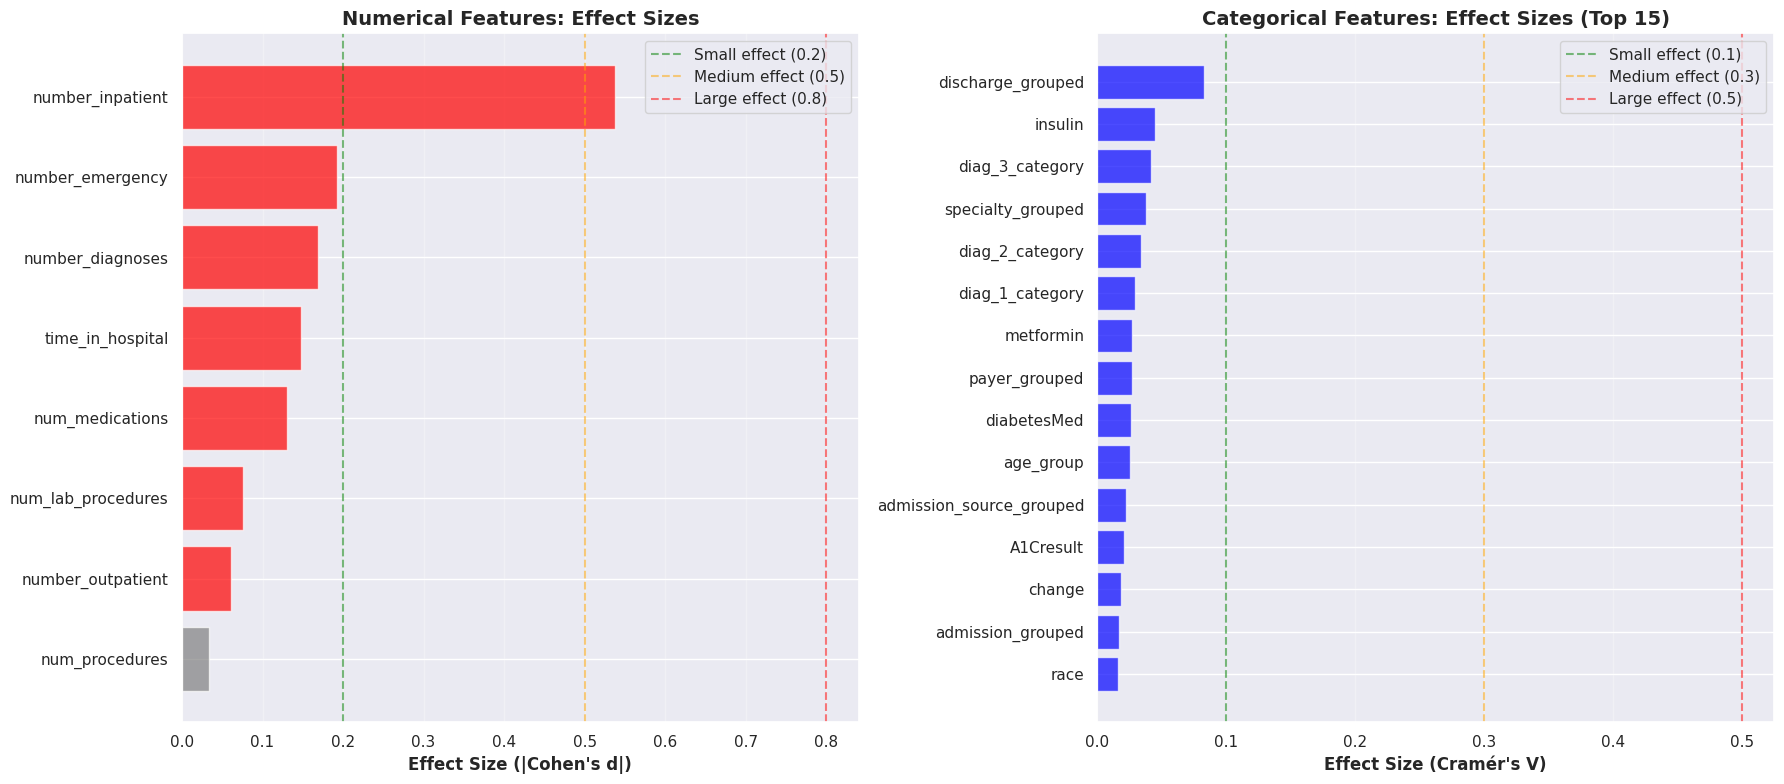


KEY FINDINGS

Top 3 Numerical Features (by effect size):
  8. number_inpatient               Cohen's d = 0.537 (Medium)
  7. number_emergency               Cohen's d = 0.192 (Negligible)
  5. number_diagnoses               Cohen's d = 0.169 (Negligible)

Top 3 Categorical Features (by effect size):
  8. discharge_grouped              Cramér's V = 0.083 (Negligible)
  20. insulin                        Cramér's V = 0.045 (Negligible)
  11. diag_3_category                Cramér's V = 0.042 (Negligible)

✅ Statistical testing complete!

Interpretation:
  • Red/Blue bars = statistically significant (p < 0.05)
  • Gray bars = not statistically significant
  • Effect size indicates practical importance
  • Statistical significance alone doesn't guarantee predictive power


In [13]:
# Combine numerical and categorical results for overall summary
print("="*80)
print("STATISTICAL TESTING SUMMARY")
print("="*80)

# Create summary visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Effect sizes for numerical features
mw_plot_df = pd.DataFrame(mann_whitney_results)
mw_plot_df['cohens_d_abs'] = mw_plot_df["Cohen's d"].astype(float).abs()
mw_plot_df = mw_plot_df.sort_values('cohens_d_abs', ascending=True)

colors_num = ['red' if sig != 'ns' else 'gray' for sig in mw_plot_df['Sig.']]
ax1.barh(mw_plot_df['Feature'], mw_plot_df['cohens_d_abs'], color=colors_num, alpha=0.7)
ax1.axvline(x=0.2, color='green', linestyle='--', label='Small effect (0.2)', alpha=0.5)
ax1.axvline(x=0.5, color='orange', linestyle='--', label='Medium effect (0.5)', alpha=0.5)
ax1.axvline(x=0.8, color='red', linestyle='--', label='Large effect (0.8)', alpha=0.5)
ax1.set_xlabel("Effect Size (|Cohen's d|)", fontsize=12, fontweight='bold')
ax1.set_title('Numerical Features: Effect Sizes', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Effect sizes for categorical features (top 15)
chi_plot_df = pd.DataFrame(chi_square_results)
chi_plot_df['cramers_v'] = chi_plot_df["Cramér's V"].astype(float)
chi_plot_df = chi_plot_df.sort_values('cramers_v', ascending=True).tail(15)

colors_cat = ['blue' if sig != 'ns' else 'gray' for sig in chi_plot_df['Sig.']]
ax2.barh(chi_plot_df['Feature'], chi_plot_df['cramers_v'], color=colors_cat, alpha=0.7)
ax2.axvline(x=0.1, color='green', linestyle='--', label='Small effect (0.1)', alpha=0.5)
ax2.axvline(x=0.3, color='orange', linestyle='--', label='Medium effect (0.3)', alpha=0.5)
ax2.axvline(x=0.5, color='red', linestyle='--', label='Large effect (0.5)', alpha=0.5)
ax2.set_xlabel("Effect Size (Cramér's V)", fontsize=12, fontweight='bold')
ax2.set_title('Categorical Features: Effect Sizes (Top 15)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Overall summary
print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)

# Top numerical features
mw_sorted = pd.DataFrame(mann_whitney_results)
mw_sorted['cohens_d_abs'] = mw_sorted["Cohen's d"].astype(float).abs()
top_numerical = mw_sorted.nlargest(3, 'cohens_d_abs')
print("\nTop 3 Numerical Features (by effect size):")
for idx, row in top_numerical.iterrows():
    print(f"  {idx+1}. {row['Feature']:30s} Cohen's d = {row['cohens_d_abs']:.3f} ({row['Effect Size']})")

# Top categorical features
chi_sorted = pd.DataFrame(chi_square_results)
chi_sorted['cramers_v'] = chi_sorted["Cramér's V"].astype(float)
top_categorical = chi_sorted.nlargest(3, 'cramers_v')
print("\nTop 3 Categorical Features (by effect size):")
for idx, row in top_categorical.iterrows():
    print(f"  {idx+1}. {row['Feature']:30s} Cramér's V = {row['cramers_v']:.3f} ({row['Effect Size']})")

print("\n" + "="*80)
print("✅ Statistical testing complete!")
print("="*80)
print("\nInterpretation:")
print("  • Red/Blue bars = statistically significant (p < 0.05)")
print("  • Gray bars = not statistically significant")
print("  • Effect size indicates practical importance")
print("  • Statistical significance alone doesn't guarantee predictive power")